# Participant information based on the Questionnaire

In [1]:
from itertools import chain

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [4]:
table = pd.read_csv('questionnaire_20200702.csv')

In [5]:
table

,Time,What is your position?,Please describe your general day-to-day activities,Why did you register for this course?,How often do you expect to use Python after the course?,How do you best learn?,"Do you expect to ""know"" Python after this course?",What do you expect to use Python for after the course?,What types of application would you find useful?,Is there anything else you would like us to know about your motivations and expectations?,What is your level of experience as a programer?,What is your level of experience with the Python programing language?,What is your level of experience with the R programming language?,Have you used any other programming language?,Please describe your programming experience
0,2020-06-24 17:16:37,PhD student,molecular plant biology,Python is popular and I want to know why.|Othe...,Sometimes when it is useful for my work,Guided learning from an expert with regular qu...,No,"Attending an Advanced Bioinformatics course, t...",Reading and writing data formats|Web scraping ...,NaN,None,NaN,NaN,NaN,NaN
1,2020-06-24 17:18:46,PhD student,"molecular lab work, evolutionary analyses",Other: I already know bash and R but never use...,Sometimes when it is useful for my work,Interactively. Experimenting with what I can do,No,Basic file manipulations to organize and plot ...,Plotting|Reading and writing data formats|Data...,NaN,Intermediate,None,Intermediate,Bash / Linux terminal,"R: can write functions, plot custom graphs, ca..."
2,2020-06-24 19:09:37,PhD student,Assessing the conservation of the genomic arch...,Python is popular and I want to know why.|Othe...,Sometimes when it is useful for my work,Guided learning from an expert with regular qu...,No,Simple scripts for my daily bioinformatic anal...,Plotting|Reading and writing data formats|Data...,NaN,Intermediate,None,Intermediate,C/C++|Bash / Linux terminal|Nextflow/SnakeMake...,"I use R daily for my PhD, and the same (less o..."
3,2020-06-25 10:31:19,PhD student,Experimental plant science,My lab/group/peers are using Python.,Sometimes when it is useful for my work,"By myself, at my own pace",Yes,For picture batch analysis,Reading and writing data formats|Web scraping ...,NaN,Beginning,Beginner,Intermediate,Javascript,"Mostly in Java, good in R"
4,2020-06-25 11:38:05,PhD student,studying plant pathogen interactions and pheno...,Python is popular and I want to know why.|My l...,Sometimes when it is useful for my work,"By myself, at my own pace|Guided learning from...",No,Image analysis (at some point),Plotting|Reading and writing data formats|Data...,NaN,Beginning,None,Beginner,Java or C#,NaN
5,2020-06-26 16:07:28,PhD student,Studying plant biology. Working with tulips in...,Python is popular and I want to know why.|Othe...,Sometimes when it is useful for my work|Other:...,Lectures with examples|Guided learning from an...,Yes,Analyzing RNAseq data,Plotting|Reading and writing data formats|Data...,NaN,None,NaN,NaN,NaN,NaN
6,2020-06-26 16:20:42,PhD student,"plant growing, sample collection, sample and d...",Python is popular and I want to know why.|My l...,Sometimes when it is useful for my work,"Small """"study groups"""" guided by relevant prob...",Yes,"big data collection and analysis, plot making",Plotting|Data analysis,NaN,Beginning,None,Beginner,NaN,NaN
7,2020-06-27 20:31:04,PhD student,vacuolar protein sorting,Python is popular and I want to know why.,Sometimes when it is useful for my work,Lectures with examples,Yes,Data analysis,Plotting|Data analysis|Embedded device program...,NaN,None,NaN,NaN,NaN,NaN
8,2020-06-27 22:14:05,PhD student,plant physiology,Python is popular and I want to know why.,Sometimes when it is useful for my work,Interactively. Experimenting with what I can d...,No,data visualization,Plotting|Data analysis,NaN,None,NaN,NaN,NaN,NaN
9,2020-06-29 09:28:03,PhD student,studying tomato fruit on a molecular level,Python is popular and I want to know why.,Sometimes when it is useful for my work,Interactively. Experimenting with what

# Who are our students?

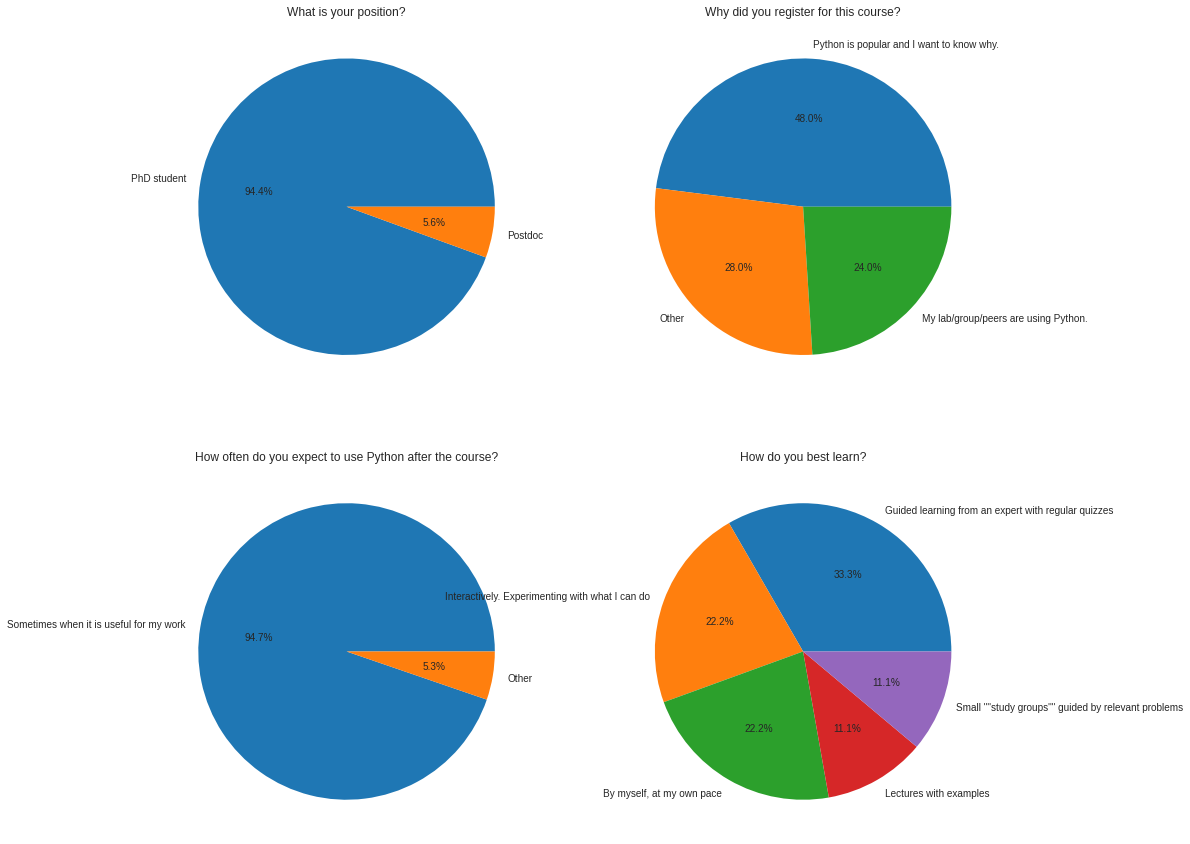

In [6]:
questions = [['What is your position?',
              'Why did you register for this course?'],
             ['How often do you expect to use Python after the course?',
              'How do you best learn?']]
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
for i, question in enumerate(questions):
    for j, q in enumerate(question):
        about = table[q]
        sep_answers = about.str.split('|').apply(pd.Series).unstack().dropna().reset_index(1,drop=True)
        other_mask = sep_answers.str.contains("Other:")
        sep_answers[other_mask] = "Other"

        labels = sep_answers.unique()
        fracs = [count / len(sep_answers) for count in sep_answers.value_counts()]
    
        axs[i,j].pie(fracs, labels=labels, autopct='%1.1f%%')
        axs[i,j].set_title(q)

plt.show()

# What are students expectations?

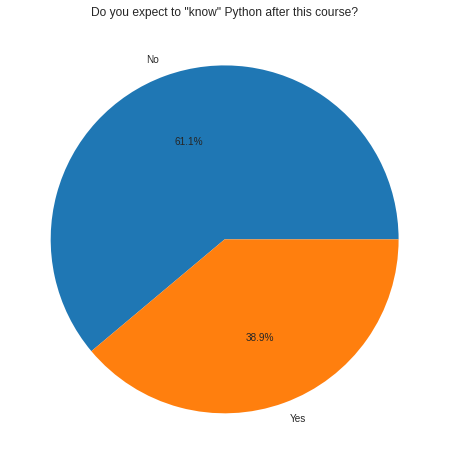

In [7]:
question = 'Do you expect to "know" Python after this course?'
know_python = table[question]

labels = know_python.unique()
fracs = [count / len(know_python) for count in know_python.value_counts()]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.pie(fracs, labels=labels, autopct='%1.1f%%')
ax.set_title(question)


plt.show()

In [8]:
use_python = list(table['What do you expect to use Python for after the course?'].str.lower())
print("\n\n".join(use_python))

attending an advanced bioinformatics course, to eventually be able to work with and analyse a pangenome and possibly to do more data analysis

basic file manipulations to organize and plot data

simple scripts for my daily bioinformatic analyses, and in general knowing the basics for then being able to improve my python skills over time

for picture batch analysis

image analysis (at some point)

analyzing rnaseq data

big data collection and analysis, plot making

data analysis

data visualization

i have some next generation sequencing results i would like to decode better than with existing tools on the internet

data analysis, such as rnaseq

recognizing what a script does, and being able to run existing scripts correctly to use these on my data. 

to be able to understand a minimum about python and be able to perform the analysis i need to do

adjusting scripts for data analysis

analyzing the data i generated from my research or maybe apply any aspect of phyton that might be usef

In [9]:
keyword_categories = {"image analysis": ["image", "picture"],
                      "data analysis": ["dat", "decode"],
                      "further learning": ["course", "improve", "better", "correct", "understand"],
                      "plotting": ["plot", "visual"]}

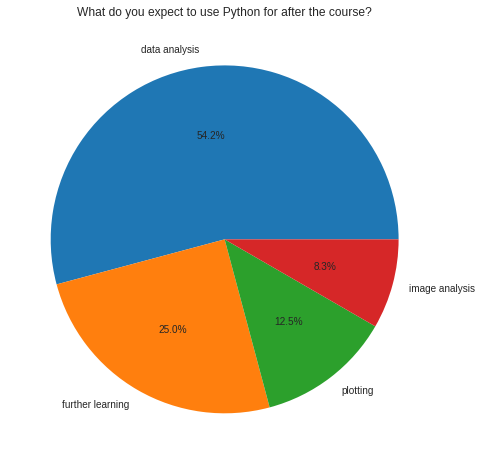

In [10]:
uses = chain.from_iterable(([summary for summary, keywords in keyword_categories.items() \
                             if any([kw in use for kw in keywords])] for use in use_python))
usesSeries = pd.Series(list(uses))
labels = usesSeries.unique()
fracs = [count / len(usesSeries) for count in usesSeries.value_counts()]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.pie(fracs, labels=labels, autopct='%1.1f%%')
ax.set_title('What do you expect to use Python for after the course?')
plt.show()

# Programing experience

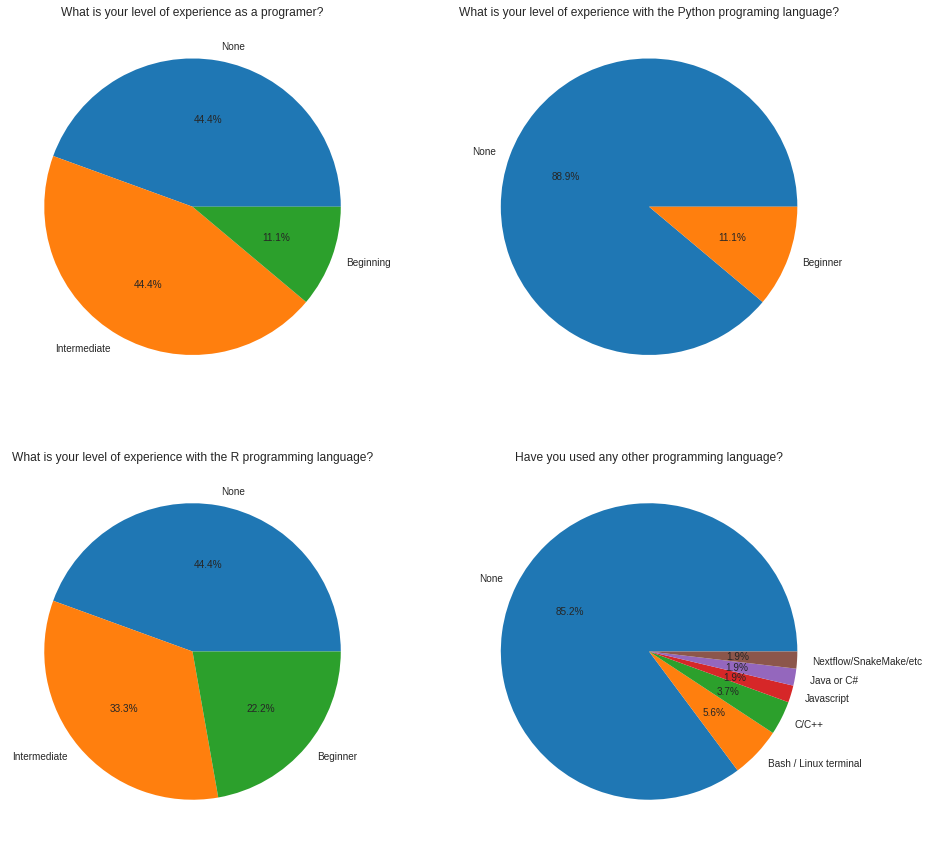

In [11]:
questions = [['What is your level of experience as a programer?',
              'What is your level of experience with the Python programing language?'],
             ['What is your level of experience with the R programming language?',
              'Have you used any other programming language?']]
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
for i, question in enumerate(questions):
    for j, q in enumerate(question):
        about = table[q]
        sep_answers = about.str.split('|').apply(pd.Series).unstack().fillna("None").reset_index(1,drop=True)
        other_mask = sep_answers.str.contains("Other:")
        sep_answers[other_mask] = "Other"

        labels = sep_answers.unique()
        fracs = [count / len(sep_answers) for count in sep_answers.value_counts()]
    
        axs[i,j].pie(fracs, labels=labels, autopct='%1.1f%%')
        axs[i,j].set_title(q)

plt.show()